In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# define paths of the datasets
olid_train_path = r"Datasets/olid-train.csv"
olid_test_path = r"Datasets/olid-test.csv"
hasoc_train_path = r"Datasets/hasoc-train.csv"

# Load the datasets
olid_train = pd.read_csv(olid_train_path)
olid_test = pd.read_csv(olid_test_path)
hasoc_train = pd.read_csv(hasoc_train_path)

# get the length of datasets
olid_train_length = len(olid_train)
hasoc_train_length = len(hasoc_train)

# Check which dataset is smaller
if olid_train_length > hasoc_train_length:
    # Undersample olid_train to match the length of hasoc_train
    olid_train = olid_train.sample(n=hasoc_train_length, random_state=42)



In [3]:
# Split the olid_train dataset into a training set and a validation set
X_train_olid, X_val_olid, Y_train_olid, Y_val_olid = train_test_split(olid_train['text'], olid_train['labels'], test_size=0.2, random_state=42)

# Split the hasoc_train dataset into a training set and a validation set
X_train_hasoc, X_val_hasoc, Y_train_hasoc, Y_val_hasoc = train_test_split(hasoc_train['text'], hasoc_train['labels'], test_size=0.2, random_state=42)

In [4]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test, name=None):
    # Create CountVectorizer objects
    vec_word = CountVectorizer(analyzer='word', ngram_range=(1, 1), lowercase=False)
    vec_char = CountVectorizer(analyzer='char', ngram_range=(3, 3), lowercase=False)

    # Transform the text data
    X_train = hstack((vec_word.fit_transform(X_train), vec_char.fit_transform(X_train)))
    X_test = hstack((vec_word.transform(X_test), vec_char.transform(X_test)))

    # Initialize and train the classifier
    clf_svc = LinearSVC(random_state=0)
    clf_svc.fit(X_train, Y_train)

    # Predict on the test set
    predicted = clf_svc.predict(X_test)

    # Print classification report
    print(classification_report(Y_test, predicted))

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(Y_test, predicted)
    display_labels = np.unique(Y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(name)
    plt.show()

    # Return the trained classifier
    return clf_svc


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       774
           1       0.55      0.55      0.55       397

    accuracy                           0.69      1171
   macro avg       0.66      0.66      0.66      1171
weighted avg       0.69      0.69      0.69      1171



C:\Users\moham\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


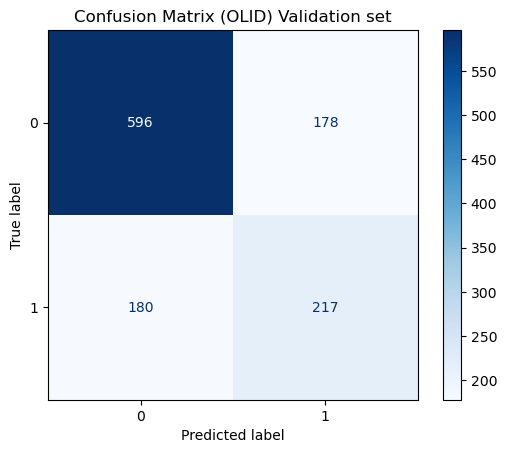

In [5]:
# Train and validate the classifier on the in-domain (OLID) dataset
classifier_olid = train_and_evaluate(X_train_olid, Y_train_olid, X_val_olid, Y_val_olid, name = "Confusion Matrix (OLID) Validation set")

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       620
           1       0.51      0.54      0.52       240

    accuracy                           0.73       860
   macro avg       0.66      0.67      0.67       860
weighted avg       0.73      0.73      0.73       860



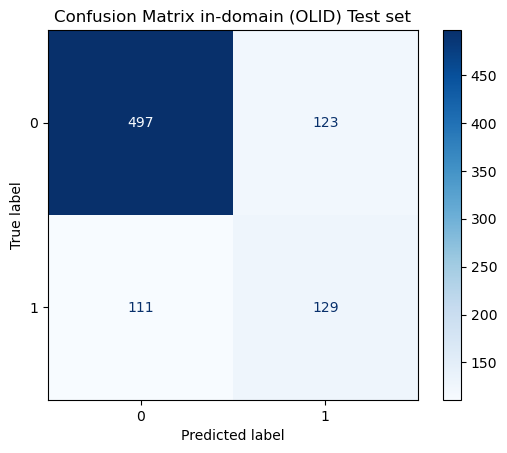

In [6]:
# Evaluate the classifier on the in-domain (OLID-test) dataset

# Create CountVectorizer objects
vec_word = CountVectorizer(analyzer='word', ngram_range=(1, 1), lowercase=False)
vec_char = CountVectorizer(analyzer='char', ngram_range=(3, 3), lowercase=False)

# Fit and transform the training data
X_train_word = vec_word.fit_transform(X_train_olid)
X_train_char = vec_char.fit_transform(X_train_olid)
X_train_olid = hstack((X_train_word, X_train_char))

# Transform the test data using the same vectorizers
X_test_word = vec_word.transform(olid_test['text'])
X_test_char = vec_char.transform(olid_test['text'])
X_test_olid = hstack((X_test_word, X_test_char))

# Use the trained classifier to make predictions on the test data
predicted_test = classifier_olid.predict(X_test_olid)

# Print classification report for the test set
print(classification_report(olid_test['labels'], predicted_test))

# Calculate and plot the confusion matrix for the test set
cm_test = confusion_matrix(olid_test['labels'], predicted_test)
display_labels_test = np.unique(olid_test['labels'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=display_labels_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix in-domain (OLID) Test set')
plt.show()


              precision    recall  f1-score   support

           0       0.70      0.69      0.69       734
           1       0.49      0.50      0.49       437

    accuracy                           0.62      1171
   macro avg       0.59      0.59      0.59      1171
weighted avg       0.62      0.62      0.62      1171



C:\Users\moham\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


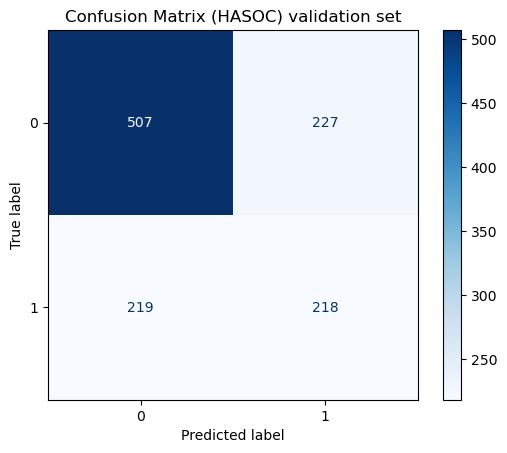

In [7]:
# Train and validate the classifier on the HASOC dataset
classifier_hasoc = train_and_evaluate(X_train_hasoc, Y_train_hasoc, X_val_hasoc, Y_val_hasoc, name= "Confusion Matrix (HASOC) validation set")

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       620
           1       0.35      0.43      0.39       240

    accuracy                           0.62       860
   macro avg       0.55      0.56      0.56       860
weighted avg       0.64      0.62      0.63       860



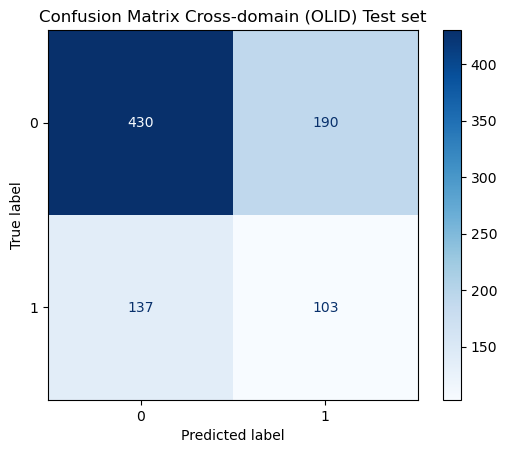

In [8]:
# Evaluate the classifier on the coss-domain (OLID-test) dataset

# Create CountVectorizer objects
vec_word = CountVectorizer(analyzer='word', ngram_range=(1, 1), lowercase=False)
vec_char = CountVectorizer(analyzer='char', ngram_range=(3, 3), lowercase=False)

# Fit and transform the training data
X_train_word = vec_word.fit_transform(X_train_hasoc)
X_train_char = vec_char.fit_transform(X_train_hasoc)
X_train_hasoc = hstack((X_train_word, X_train_char))

# Transform the test data using the same vectorizers
X_test_word = vec_word.transform(olid_test['text'])
X_test_char = vec_char.transform(olid_test['text'])
X_test_olid = hstack((X_test_word, X_test_char))

# Use the trained classifier to make predictions on the test data
predicted_test = classifier_hasoc.predict(X_test_olid)

# Print classification report for the test set
print(classification_report(olid_test['labels'], predicted_test))

# Calculate and plot the confusion matrix for the test set
cm_test = confusion_matrix(olid_test['labels'], predicted_test)
display_labels_test = np.unique(olid_test['labels'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=display_labels_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Cross-domain (OLID) Test set')
plt.show()
